In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.datasets import load_diabetes

In [3]:
data = pd.read_csv("C:\\Users\\steve\\OneDrive\\Desktop\\Full stack data science\\Regression\\Ice-cream-selling-data-csv_6UnYJ.csv")

In [4]:
data.columns

Index(['Temperature (°C)', 'Ice Cream Sales (units)'], dtype='object')

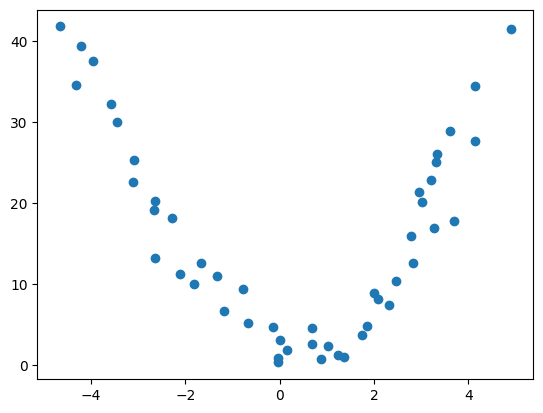

In [5]:
plt.scatter(data['Temperature (°C)'], data['Ice Cream Sales (units)'])

In [6]:
# from graphs it is clear that there is a non linear relationship between temperature and ice cream sales
# so we will make a polynomial regression model

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [13]:
x = data[["Temperature (°C)"]]
y = data[["Ice Cream Sales (units)"]]

In [14]:
# we find degree by experimentation

In [26]:
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression()) 
poly_model1 = make_pipeline(PolynomialFeatures(degree=4), LinearRegression()) 
poly_model2 = make_pipeline(PolynomialFeatures(degree=5), LinearRegression()) 
poly_model3 = make_pipeline(PolynomialFeatures(degree=16), LinearRegression()) 
poly_model4 = make_pipeline(PolynomialFeatures(degree=13), LinearRegression()) 

In [27]:
poly_model.fit(x,y)
poly_model1.fit(x,y)
poly_model2.fit(x,y)
poly_model3.fit(x,y)
poly_model4.fit(x,y)

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,13
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [28]:
y_pred = poly_model.predict(x)

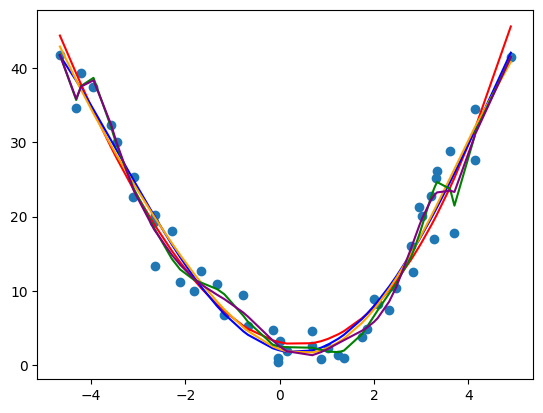

In [29]:
plt.scatter(data['Temperature (°C)'], data['Ice Cream Sales (units)'])
plt.plot(x, y_pred, color='red')
plt.plot(x, poly_model1.predict(x), color='blue')
plt.plot(x, poly_model2.predict(x), color='orange')
plt.plot(x, poly_model3.predict(x), color='green')
plt.plot(x, poly_model4.predict(x), color='purple')

In [30]:
# more degree may increase overfitting

In [31]:
# now we calculate r2 score 

In [32]:
from sklearn.metrics import r2_score


In [36]:
print(r2_score(y, y_pred))
print(r2_score(y, poly_model1.predict(x)))
print(r2_score(y, poly_model2.predict(x)))      
print(r2_score(y, poly_model3.predict(x)))
print(r2_score(y, poly_model4.predict(x)))

0.9367011897445384
0.9438453407370606
0.945283262189464
0.9652908939417345
0.961661708010878


In [37]:
print(mean_squared_error(x, y_pred))
print(mean_squared_error(x, poly_model1.predict(x)))
print(mean_squared_error(x, poly_model2.predict(x)))      
print(mean_squared_error(x, poly_model3.predict(x)))
print(mean_squared_error(x, poly_model4.predict(x)))

400.91796378855406
401.97067291927857
402.18255436520224
405.1306341674179
404.59596008706086


In [38]:
#Homework convert this to ridge and lasso regression into streamlit application and deploy in streamlit cloud and also connect with mongo db
#do same with polynomial regression

In [41]:
import pickle
#Saving the model in the file
with open("polynomial_reg.pkl" , 'wb') as file:
    pickle.dump(poly_model2,file) # so that the model can understand the transformations and standardizations